In [2]:
import pandas_datareader as pdr 


In [3]:
key = "5d0ff8813ad56c9cf82fc7bb2ada8a5ca05fb8e1"

In [4]:
import pandas as pd

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

/usr/local/lib/python3.9/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-03-12 00:00:00+00:00,181.72,182.39,180.21,180.29,32055405,43.250740,43.410205,42.891348,42.910389,128221620,0.0,1.0
1,AAPL,2018-03-13 00:00:00+00:00,179.97,183.50,179.24,182.59,31168404,42.834226,43.674393,42.660481,43.457806,124673616,0.0,1.0
2,AAPL,2018-03-14 00:00:00+00:00,178.44,180.52,177.81,180.32,29075469,42.470075,42.965131,42.320130,42.917529,116301876,0.0,1.0
3,AAPL,2018-03-15 00:00:00+00:00,178.65,180.24,178.07,178.50,22584565,42.520056,42.898489,42.382012,42.484355,90338260,0.0,1.0
4,AAPL,2018-03-16 00:00:00+00:00,178.02,179.12,177.62,178.65,36836456,42.370112,42.631920,42.274909,42.520056,147345824,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-03-03 00:00:00+00:00,151.03,151.1100,147.330,148.045,70732297,151.03,151.1100,147.330,148.045,70732297,0.0,1.0
1254,AAPL,2023-03-06 00:00:00+00:00,153.83,156.3000,153.460,153.785,87558028,153.83,156.3000,153.460,153.785,87558028,0.0,1.0
1255,AAPL,2023-03-07 00:00:00+00:00,151.60,154.0299,151.130,153.700,56182028,151.60,154.0299,151.130,153.700,56182028,0.0,1.0
1256,AAPL,2023-03-08 00:00:00+00:00,152.87,153.4700,151.830,152.810,47204791,152.87,153.4700,151.830,152.810,47204791,0.0,1.0
1257,AAPL,2023-03-09 00:00:00+00:00,150.59,154.5350,150.225,153.559,53833582,150.59,154.5350,150.225,153.559,53833582,0.0,1.0


In [9]:
df2 = df.reset_index()['close']

In [10]:
df2.shape

(1258,)

In [11]:
import matplotlib.pyplot as plt

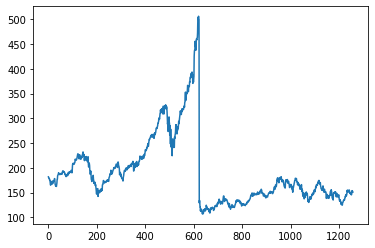

In [12]:
plt.plot(df2)

In [13]:
import numpy as np 

In [14]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
df2 = Scaler.fit_transform(np.array(df2).reshape(-1,1))


In [15]:
df2.shape

(1258, 1)

In [16]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size 
training_data, test_data = df2[0:training_size,:],df2[training_size:len(df2),:]

In [17]:
training_size,test_size

(817, 441)

In [18]:
import numpy
def create_dataset(dataset, time_step =1):
  dataX,dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)



In [19]:
time_step = 100
xtrain, ytrain = create_dataset(training_data,time_step)
xtest,ytest = create_dataset(test_data,time_step)

In [20]:
#Reshaping the train and test data inorder to suit to LSTM 
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer= 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs =100, batch_size =64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 343ms/step - loss: 0.0432 - val_loss: 0.0018
Epoch 2/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0176 - val_loss: 0.0066
Epoch 3/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0111 - val_loss: 4.1366e-04
Epoch 4/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0096 - val_loss: 4.9397e-04
Epoch 5/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0089 - val_loss: 0.0013
Epoch 6/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0071 - val_loss: 3.5082e-04
Epoch 7/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0065 - val_loss: 5.1210e-04
Epoch 8/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0062 - val_loss: 5.8479e-04
Epoch 9/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0056 - val_loss: 3.4252e-04
Epoch 10/100
12/12 [==============================] - 3s 216ms/ste

In [25]:
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)

11/11 [==============================] - 0s 43ms/step


In [26]:
train_predict = Scaler.inverse_transform(train_predict)
test_predict = Scaler.inverse_transform(test_predict)

In [27]:
import math 
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error(ytrain,train_predict))

222.4472097277511

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

151.2287480749512

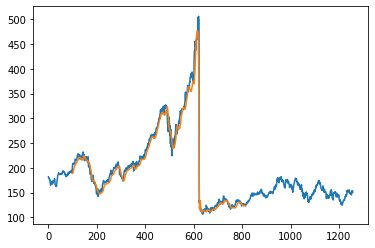

In [29]:
look_back = 100
trainPredictplot = numpy.empty_like(df2)
trainPredictplot[:,:] = np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictplot = numpy.empty_like(df2)
testPredictplot[:,:] = np.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(df2)-1,:] = test_predict
plt.plot(Scaler.inverse_transform(df2))
plt.plot(trainPredictplot)
plt.show()


In [30]:
X_input = test_data[341:].reshape(1,-1)

In [31]:
X_input.shape

(1, 100)

In [33]:
temp_list = list(X_input)
temp_list = temp_list[0].tolist()

In [40]:
from numpy import array
lst_output = []
n_steps = 100
i =0
while(i<30):
  if(len(temp_list)>100):
    X_input = np.array(temp_list[1:])
    print("{} day input {}".format(i,X_input))
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1,n_steps,1))
    y_hat = model.predict(X_input, verbose =0)
    print("{} day output {}".format(i,y_hat))
    temp_list.extend(y_hat[0].tolist())
    temp_list = temp_list[1:]
    lst_output.extend(y_hat.tolist())
    i=i+1
  else:
    X_input = X_input.reshape((1,n_steps,1))
    y_hat = model.predict(X_input, verbose =0)
    print(y_hat[0])
    temp_list.extend(y_hat[0].tolist())
    lst_output.extend(y_hat.tolist())



    i = i+1




[0.09788112]
1 day input [0.08909205 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511
 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075
 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664
 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607
 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555
 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444
 0.08541014 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958
 0.07428929 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424
 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344 0.04566061
 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016
 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073
 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982
 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.105

In [41]:
day_new =np.arange(1,101)
day_pred = np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df2)

1258

In [44]:
df3 = df2.tolist()
df3.extend(lst_output)

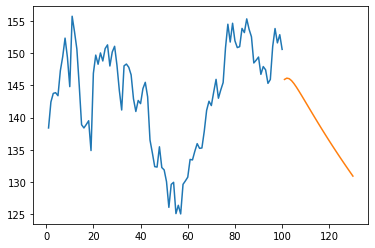

In [47]:
plt.plot(day_new,Scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,Scaler.inverse_transform(lst_output))